In [19]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [20]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [21]:
len(X_train)

60000

In [22]:
len(X_test)

10000

In [23]:
X_train[0].shape

(28, 28)

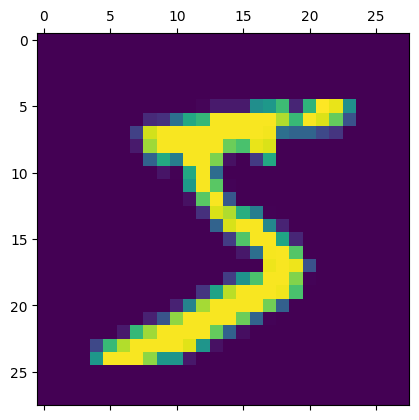

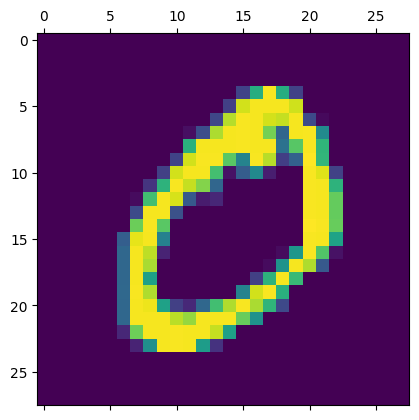

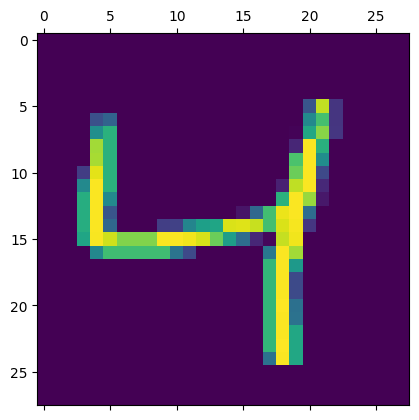

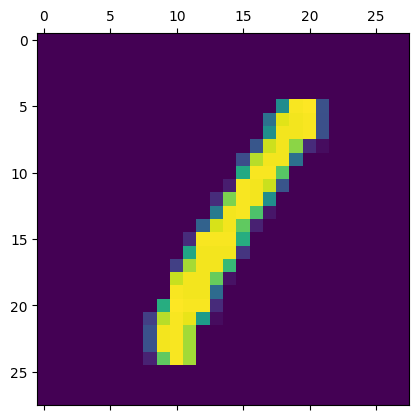

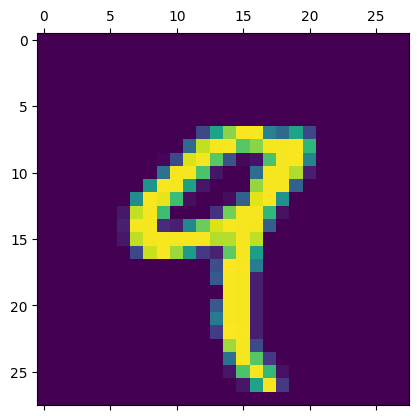

In [24]:
for i in range(5):
    plt.matshow(X_train[i])

In [25]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [26]:
X_train = X_train / 255
X_test = X_test / 255

In [27]:
X_train_flattened = X_train.reshape(len(X_train), 784)
X_test_flattened = X_test.reshape(len(X_test), 784)

In [28]:
X_train_flattened.shape

(60000, 784)

In [29]:
X_test_flattened.shape

(10000, 784)

In [30]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,), activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5


c:\python 3.9\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 499us/step - accuracy: 0.8149 - loss: 0.7198
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 478us/step - accuracy: 0.9130 - loss: 0.3148
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 492us/step - accuracy: 0.9204 - loss: 0.2877
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 484us/step - accuracy: 0.9250 - loss: 0.2692
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 489us/step - accuracy: 0.9266 - loss: 0.2642


In [31]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - accuracy: 0.9139 - loss: 0.3064


[0.271596223115921, 0.9247999787330627]

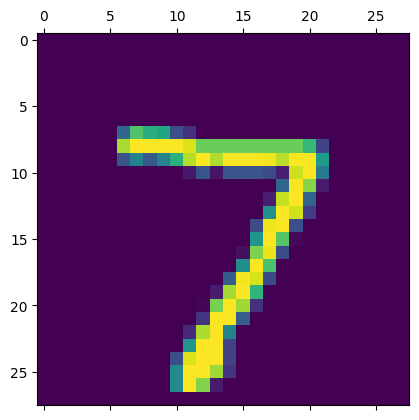

In [32]:
plt.matshow(X_test[0])

In [33]:
y_preds = model.predict(X_test_flattened)
y_preds[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step


array([3.4013856e-02, 3.9886478e-07, 6.0959715e-02, 9.4163138e-01,
       2.6727482e-03, 1.6553280e-01, 2.6330545e-06, 9.9985880e-01,
       1.2209116e-01, 6.6474253e-01], dtype=float32)

In [34]:
np.argmax(y_preds[0])

7

In [37]:
y_preds_label = [np.argmax(i) for i in y_preds]
y_preds_label[:5]

[7, 2, 1, 0, 4]

In [39]:
tf.math.confusion_matrix(labels=y_test, predictions=y_preds_label)

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    0,    2,    0,    5,   11,    2,    1,    0],
       [   0, 1109,    3,    2,    0,    1,    4,    2,   14,    0],
       [   6,    7,  932,   15,    6,    6,   15,   11,   31,    3],
       [   4,    0,   19,  919,    0,   29,    4,   13,   16,    6],
       [   1,    1,    4,    1,  905,    0,   18,    5,   10,   37],
       [  10,    2,    3,   23,    6,  796,   20,    5,   20,    7],
       [  10,    3,    4,    1,    7,   11,  919,    2,    1,    0],
       [   1,    5,   23,    3,    5,    1,    0,  963,    4,   23],
       [  10,    6,    7,   24,    8,   44,   14,   14,  841,    6],
       [  11,    7,    1,   10,   25,   11,    0,   33,    6,  905]])>

In [50]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape = (784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])  

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 826us/step - accuracy: 0.8764 - loss: 0.4415
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 880us/step - accuracy: 0.9587 - loss: 0.1382
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 862us/step - accuracy: 0.9736 - loss: 0.0897
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 908us/step - accuracy: 0.9807 - loss: 0.0643
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 876us/step - accuracy: 0.9850 - loss: 0.0503


In [51]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - accuracy: 0.9687 - loss: 0.0916


[0.0829182118177414, 0.9729999899864197]

In [52]:
y_preds = model.predict(X_test_flattened)
y_preds_label = [np.argmax(i) for i in y_preds]
tf.math.confusion_matrix(labels=y_test, predictions=y_preds_label)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 968,    0,    2,    0,    1,    0,    4,    1,    3,    1],
       [   0, 1126,    3,    0,    0,    0,    2,    0,    4,    0],
       [   4,    4,  997,    4,    3,    0,    2,    7,   10,    1],
       [   0,    1,    8,  962,    0,   16,    1,    8,    8,    6],
       [   0,    0,    2,    1,  964,    0,    5,    1,    2,    7],
       [   2,    0,    0,    3,    3,  873,    4,    1,    6,    0],
       [   5,    3,    2,    1,    6,    5,  936,    0,    0,    0],
       [   1,    3,    7,    1,    1,    0,    0, 1005,    4,    6],
       [   5,    0,    4,    3,    4,    3,    8,    5,  939,    3],
       [   4,    5,    0,    3,   21,    1,    0,    7,    8,  960]])>